## Team Members

Shivam Thakker

Karthik Varunn

Abdelrahman Zeidan

Rashaad Mohammed

## Tasks

You are given more than 200k news items from HuffPost. The dataset is taken from a Kaggle competition:
The news articles in the dataset are each tagged with one of several categories (such as Politics, Technology,
Entertainment, etc.). Each entry in the dataset typically includes the headline and a short description of the article, along
with its assigned category/ The primary objective is to develop and compare various machine learning models to
categorize news articles into predefined categories based on their headlines and short descriptions. This assignment will
help you understand text classification nuances using traditional machine learning and deep learning approaches.

## 1. Data Preprocessing:

- Load the dataset and perform initial exploration to understand its structure.
- Clean the text data, including removing special characters, stopwords, and applying lowercasing.
- Perform text tokenization and vectorization using techniques like TF-IDF.
- Extract and analyze different features from the text that might be useful for classification, such as word count,
sentence length, n-grams, etc.

## 2. Model Implementation and Evaluation:

- Divide the dataset into training and testing sets.
- Implement the following models and evaluate their performance on the test set using metrics such as accuracy,
precision, recall, and F1-score:
- Logistic Regression: Use as a baseline model to understand the linear separability of text categories.
- Random Forest (RF): Explore ensemble methods in handling high-dimensional text data.
- XGBoost:
- Artificial Neural Network (ANN): Design a simple feedforward neural network with at least one hidden layer to
classify news categories.
- Convolutional Neural Network (CNN): Implement a CNN to capture local dependencies in text data. Discuss the
choice of the architecture in the context of text data.
Optionally
- Long Short-Term Memory (LSTM): Use LSTM to model dependencies in text sequences.

## 3. Comparative Analysis:

- Compare the performance of conventional ML techniques with deep learning techniques. Discuss the trade-offs
involved, such as computational complexity, model interpretability, and performance.
- Visualize the results using confusion matrices (and optionally ROC curves) for each model.

## 4. Discussion:

- Discuss the challenges encountered during the implementation of each model, including issues related to
overfitting, underfitting, and model tuning.
- Reflect on the importance of preprocessing and feature engineering in text classification tasks.


# Task 1: Data preprocessing

In [4]:
# Importing dependencies
import os
import sys
import time
import datetime

import pandas as pd
import numpy as np
import re
import nltk
import datetime
import swifter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import SGD 
# xgboost import
import xgboost as xgb


In [5]:
#  Load the dataset and perform initial exploration to understand its structure.
df = pd.read_csv("C:/Users/thakk/Academics/Courses/NLP/Assignment A2/News_Category_Dataset_v3.csv")
print(df.shape)
print(f"There are {df['category'].value_counts().shape[0]} categories. \nThe Categories are:\n {df['category'].value_counts()}")
df.head()

(209527, 8)
There are 42 categories. 
The Categories are:
 category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1

,Unnamed: 0,headline,category,short_description,authors,date,headline_length,short_description_length
0,0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,76,154
1,1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,89,159
2,2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,69,64
3,3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,56,159
4,4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,77,156


## Removed rows with empty headline or short_description

In [6]:
df = df.dropna(subset=['headline', 'short_description'])
df.shape

(189814, 8)

## Data Preprocessing

In [7]:
#  Clean the text data, including removing special characters, stopwords, and applying lowercasing.
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# A function to clean the text data
def clean_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

print("Cleaning headlines:", end=" ")
df['clean_text_headlines'] = df['headline'].swifter.apply(clean_text)
print("done")

print("Cleaning short_description:", end=" ")
df['clean_text_short_description'] = df['short_description'].swifter.apply(clean_text)
print("done")

Cleaning headlines: 

Pandas Apply:   0%|          | 0/189814 [00:00<?, ?it/s]

done
Cleaning short_description: 

Pandas Apply:   0%|          | 0/189814 [00:00<?, ?it/s]

done


## TFIDF Vectorizer

In [8]:
#  Perform text tokenization and vectorization using techniques like TF-IDF.
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(
    min_df = 300,
    max_df=0.80, 
    stop_words='english'
)

X = vectorizer.fit_transform(df['clean_text_headlines'] + " " + df['clean_text_short_description'])
X.shape

(189814, 2001)

## DTM Creation

In [9]:
# Creating DTM
dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# remove columns with numbers in them
dtm = dtm[dtm.columns.drop(list(dtm.filter(regex='[0-9]')))]
# get new X 
X = dtm

In [10]:
print("Shape of final design matrix: ",X.shape)
print("Shape of target: ",df['category'].shape)

Shape of final design matrix:  (189814, 1970)
Shape of target:  (189814,)


# 2. Model Implementation and Evaluation:

In [11]:

# Dividing the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the X_train and X_test to df with the column names


## Using SVD for feature reduction: SVD over PCA since it works better for sparse data

In [ ]:
# Run Truncated SVD to get vectors that represent 80% of the variance in X_train_df
n_components = X_train.shape[1]
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train) 

# Calculate cumulative explained variance
cum_var = np.cumsum(svd.explained_variance_ratio_)

# Minimum number of components to reach 0.8 cumulative explained variance
n_components = np.argmax(cum_var >= 0.8) + 1 

# Fit it to test set
X_test_svd = svd.transform(X_test)

In [47]:
# Get the explained variance ratios
explained_variance_ratios = svd.explained_variance_ratio_

# Calculate cumulative explained variance ratios
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

# find the number of components that explain 80% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print("Number of components to explain 80% of the variance: ", n_components)
print("Cumulative explained variance at n_components: ", cumulative_variance_ratio[n_components-1])

Number of components to explain 80% of the variance:  1206
Cumulative explained variance at n_components:  0.8000573773799672


In [48]:
# Fit the training data to the number of components
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train)

# Fit the test data to the number of components
X_test_svd = svd.transform(X_test)


## Saving SVD for future use

In [19]:
# Create a new DataFrame with the transformed data
X_train_svd_df = pd.DataFrame(X_train_svd)
X_test_svd_df = pd.DataFrame(X_test_svd)

# Save all the test,train features and target variables as CSVs: For reusability
X_train_svd_df.to_csv('X_train_svd.csv', index=False)
X_test_svd_df.to_csv('X_test_svd.csv', index=False)
y_train_encoded_df = pd.DataFrame(y_train_encoded)
y_test_encoded_df = pd.DataFrame(y_test_encoded)
y_train_encoded_df.to_csv('y_train_encoded.csv', index=False)
y_test_encoded_df.to_csv('y_test_encoded.csv', index=False)

## Load the saved training and testing feature and target variables

In [12]:
# Load the saved CSVs
X_train_svd = pd.read_csv('C:/Users/thakk/Downloads/X_train_svd_df.csv')
X_test_svd = pd.read_csv('C:/Users/thakk/Downloads/X_test_svd_df.csv')
y_train_encoded = pd.read_csv('C:/Users/thakk/Downloads/y_train_encoded.csv')
y_test_encoded = pd.read_csv('C:/Users/thakk/Downloads/y_test_encoded.csv')


## i) Logistic regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# model fitting
log_model = LogisticRegression(max_iter=10, penalty = 'l1', solver='saga')
log_model.fit(X_train_svd, y_train_encoded)

# predicting
y_pred_log = log_model.predict(X_test_svd)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_log))

# Print a classification report

classification_report(y_test_encoded, y_pred_log, target_names=label_encoder.classes_, output_dict = True)

## Train-Test Score

In [32]:
# Get train and test scores
train_score = log_model.score(X_train_svd, y_train_encoded)
test_score = log_model.score(X_test_svd, y_test_encoded)
 
# Print the train and test scores
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.5609446101770815
Test score: 0.5315438716645154


## Confusion Matrix

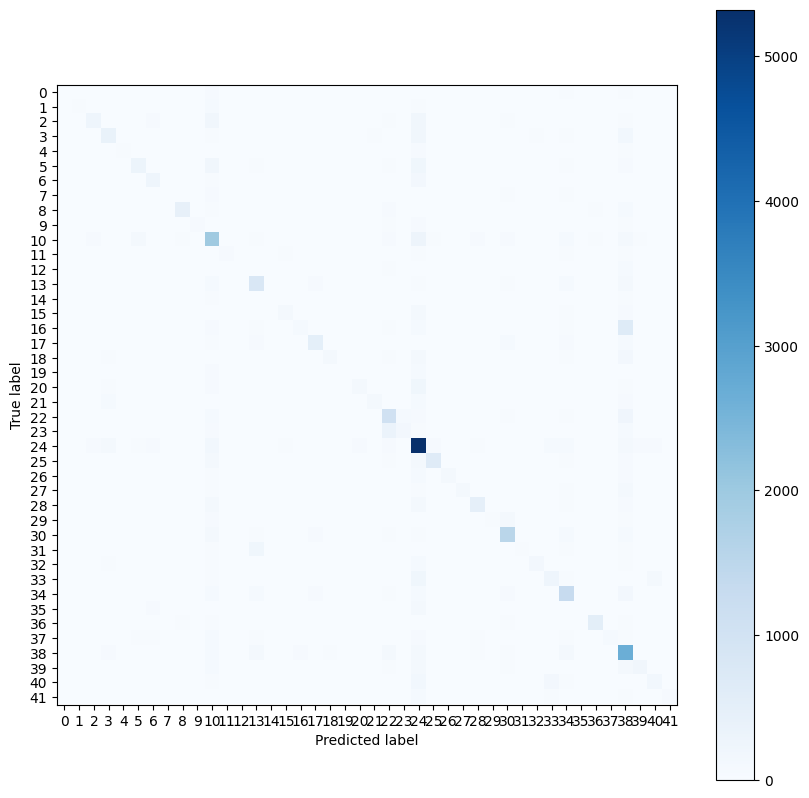

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_encoded, y_pred_log)
labels = df['category'].unique()  # Assuming you have access to category labels
 
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues, include_values=False)

## ii) Random Forest

In [36]:
# Using the best parameters from the grid search for the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(n_estimators=100, random_state=42)
rf_best.fit(X_train_svd, y_train_encoded)
y_pred_rf_best = rf_best.predict(X_test_svd)
 
# Print a classification report
print(classification_report(y_test_encoded, y_pred_rf_best, target_names=label_encoder.classes_))
 
# Get the training and testing scores
train_score = rf_best.score(X_train_svd, y_train_encoded)
test_score = rf_best.score(X_test_svd, y_test_encoded)
print(f"Training score: {train_score:.2f}")
print(f"Testing score: {test_score:.2f}")

c:\Users\thakk\miniconda3\envs\temp\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\thakk\miniconda3\envs\temp\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thakk\miniconda3\envs\temp\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thakk\miniconda3\envs\temp\lib\site-packages\sklea

                precision    recall  f1-score   support

          ARTS       0.60      0.02      0.03       173
ARTS & CULTURE       0.17      0.00      0.01       259
  BLACK VOICES       0.51      0.19      0.28       862
      BUSINESS       0.40      0.09      0.15       947
       COLLEGE       0.00      0.00      0.00       178
        COMEDY       0.60      0.06      0.10       926
         CRIME       0.37      0.25      0.30       559
CULTURE & ARTS       0.47      0.03      0.06       236
       DIVORCE       0.87      0.47      0.61       713
     EDUCATION       0.33      0.01      0.01       186
 ENTERTAINMENT       0.32      0.56      0.41      3009
   ENVIRONMENT       0.95      0.07      0.13       290
         FIFTY       0.00      0.00      0.00       230
  FOOD & DRINK       0.51      0.42      0.46      1258
     GOOD NEWS       0.00      0.00      0.00       187
         GREEN       0.42      0.04      0.07       395
HEALTHY LIVING       0.34      0.02      0.03  

## Confusion Matrix

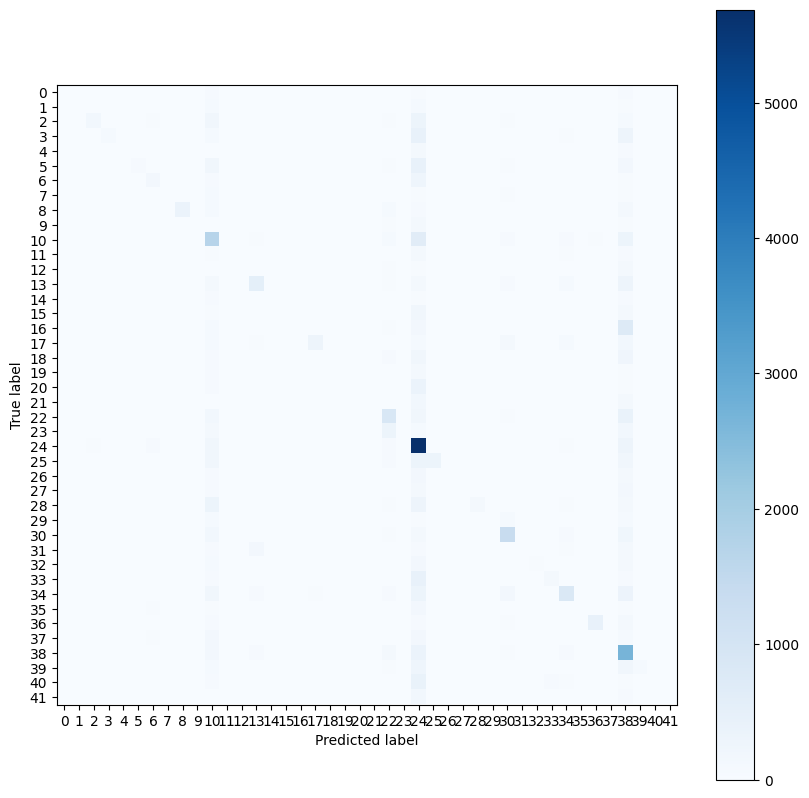

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, y_pred_rf_best)
labels = df['category'].unique()  # Assuming you have access to category labels
 
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues, include_values=False)

## iii) XGboost 

In [20]:
# XGBoost
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import classification_report
N_CORES = joblib.cpu_count(only_physical_cores=True)

params = {
    'num_class': 42,                 
    'eval_metric': 'mlogloss'        
}

xgb_model = XGBRegressor(
    n_estimators=100, max_depth=3, use_label_encoder = False, objective = 'multi:softmax', num_class = 42, eval_metric = 'mlogloss', learning_rate=0.1, random_state=42, n_jobs=N_CORES
)
xgb_model.fit(X_train_svd, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test_svd)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))
                            
#Get the training anf testing score

train_score = xgb_model.score(X_train_svd,y_train_encoded)
test_score = xgb_model.score(X_test_svd,y_test_encoded)
print(train_score,test_score)

Accuracy: 0.462344914785449
Confusion Matrix:
 [[ 10   6   3 ...   2   0   0]
 [  1  14   3 ...   7   1   0]
 [  0   0 204 ...  11   0   0]
 ...
 [  0   2   1 ... 147   1   0]
 [  1   0   3 ...   7  68   4]
 [  0   0   0 ...   4   8  13]]
                precision    recall  f1-score   support

          ARTS       0.25      0.06      0.09       173
ARTS & CULTURE       0.17      0.05      0.08       259
  BLACK VOICES       0.47      0.24      0.31       862
      BUSINESS       0.39      0.20      0.27       947
       COLLEGE       0.25      0.22      0.23       178
        COMEDY       0.56      0.16      0.25       926
         CRIME       0.36      0.40      0.38       559
CULTURE & ARTS       0.29      0.04      0.07       236
       DIVORCE       0.77      0.52      0.62       713
     EDUCATION       0.35      0.21      0.26       186
 ENTERTAINMENT       0.37      0.54      0.44      3009
   ENVIRONMENT       0.50      0.10      0.16       290
         FIFTY       0.50      0

## Confusion Matrix

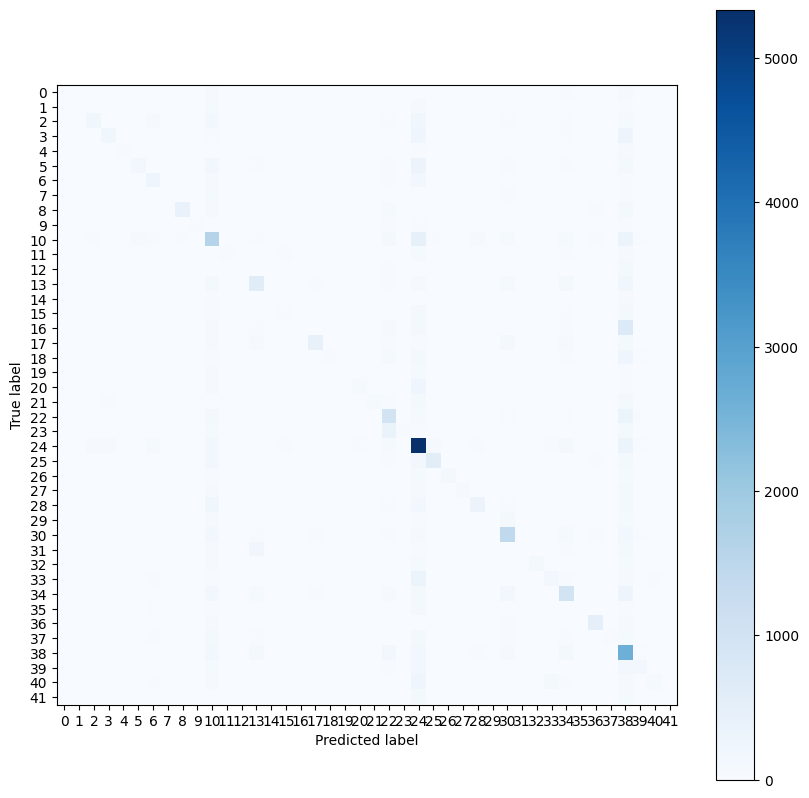

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, y_pred_xgb)
labels = df['category'].unique()  # Assuming you have access to category labels
 
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues, include_values=False)

## iV) ANN

In [42]:
# Importing the required libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the input shape
input_shape = (X_train_svd.shape[1],)
 
# Create the ANN model
model = Sequential()
model.add(Dense(256, activation='tanh', input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
 

# Compile the model
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Convert DataFrame or Series to Numpy array
x_train = X_train_svd.to_numpy() if isinstance(X_train_svd, (pd.DataFrame, pd.Series)) else X_train_svd
y_train = y_train_encoded.to_numpy() if isinstance(y_train_encoded, (pd.DataFrame, pd.Series)) else y_train_encoded
x_test = X_test_svd.to_numpy() if isinstance(X_test_svd, (pd.DataFrame, pd.Series)) else X_test_svd
y_test = y_test_encoded.to_numpy() if isinstance(y_test_encoded, (pd.DataFrame, pd.Series)) else y_test_encoded
 
# Train the model
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=15, batch_size=32)
 
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.4074 - loss: 2.3741 - val_accuracy: 0.5138 - val_loss: 1.8302
Epoch 2/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.5101 - loss: 1.8660 - val_accuracy: 0.5193 - val_loss: 1.7918
Epoch 3/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.5225 - loss: 1.8044 - val_accuracy: 0.5215 - val_loss: 1.7784
Epoch 4/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.5259 - loss: 1.7756 - val_accuracy: 0.5260 - val_loss: 1.7632
Epoch 5/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.5290 - loss: 1.7545 - val_accuracy: 0.5256 - val_loss: 1.7603
Epoch 6/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.5303 - loss: 1.7422 - val_accuracy: 0.5275 - val_loss: 1.7588
Epoch 7/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 88s 23ms/step - accuracy: 0.5338 - loss: 1.7289 - val_accuracy: 0.5275 - val_loss: 1.7607
Epoch 8/15
3797/3797 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.5370 -

## Plotting model accuracy and loss for train and validation data

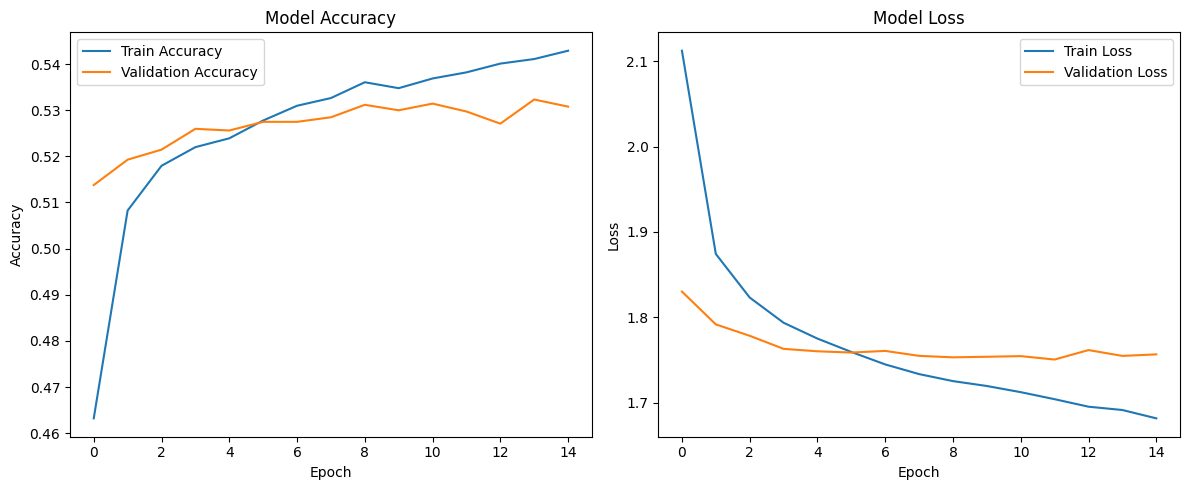

In [43]:
import matplotlib.pyplot as plt
 
# Plot the training history
plt.figure(figsize=(12, 5))
 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.tight_layout()
plt.show()

## Grid Search for ANN

### We haven't run the grid search on local as it was taking a lot of time and was computational heavy. So we ran it on Discovery cluster and directly used the paramters that it gave.

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Define the function to create the ANN model
def create_model(optimizer='RMSprop', activation='relu', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(256, activation=activation, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create Keras model
keras_model = create_model()

# Define the parameter grid
param_grid = {
    'optimizer': ['RMSprop', 'Adam'],
    'activation': ['relu', 'elu'],
    'dropout_rate': [0.1, 0.2, 0.3]
}

# Perform grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)


## V) CNN

In [13]:
from keras.utils import to_categorical

y_train_hot_encoded = to_categorical(y_train_encoded)
y_test_hot_encoded = to_categorical(y_test_encoded)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the input shape
input_shape = (X_train_svd.shape[1],1)

# Create the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train = X_train_svd.to_numpy() if isinstance(X_train_svd, (pd.DataFrame, pd.Series)) else X_train_svd
y_train = y_train_hot_encoded.to_numpy() if isinstance(y_train_hot_encoded, (pd.DataFrame, pd.Series)) else y_train_hot_encoded
x_test = X_test_svd.to_numpy() if isinstance(X_test_svd, (pd.DataFrame, pd.Series)) else X_test_svd
y_test = y_test_hot_encoded.to_numpy() if isinstance(y_test_hot_encoded, (pd.DataFrame, pd.Series)) else y_test_hot_encoded


# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)
#Evaluate model

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



Epoch 1/15


3797/3797 [==============================] - 60s 16ms/step - loss: 2.5386 - accuracy: 0.3631 - val_loss: 2.0667 - val_accuracy: 0.4669
Epoch 2/15
3797/3797 [==============================] - 58s 15ms/step - loss: 2.1648 - accuracy: 0.4427 - val_loss: 1.9872 - val_accuracy: 0.4818
Epoch 3/15
3797/3797 [==============================] - 667s 176ms/step - loss: 2.0730 - accuracy: 0.4601 - val_loss: 1.9605 - val_accuracy: 0.4839
Epoch 4/15
3797/3797 [==============================] - 596s 157ms/step - loss: 2.0025 - accuracy: 0.4721 - val_loss: 1.9358 - val_accuracy: 0.4915
Epoch 5/15
3797/3797 [==============================] - 55s 14ms/step - loss: 1.9333 - accuracy: 0.4843 - val_loss: 1.9412 - val_accuracy: 0.4920
Epoch 6/15
3797/3797 [==============================] - 57s 15ms/step - loss: 1.8787 - accuracy: 0.4953 - val_loss: 1.9471 - val_accuracy: 0.4910
Epoch 7/15
3797/3797 [==============================] - 63s 17ms/step - loss: 1.8325 - accuracy: 0.5012 - val_loss: 1

## Plotting model accuracy and loss for train and validation data

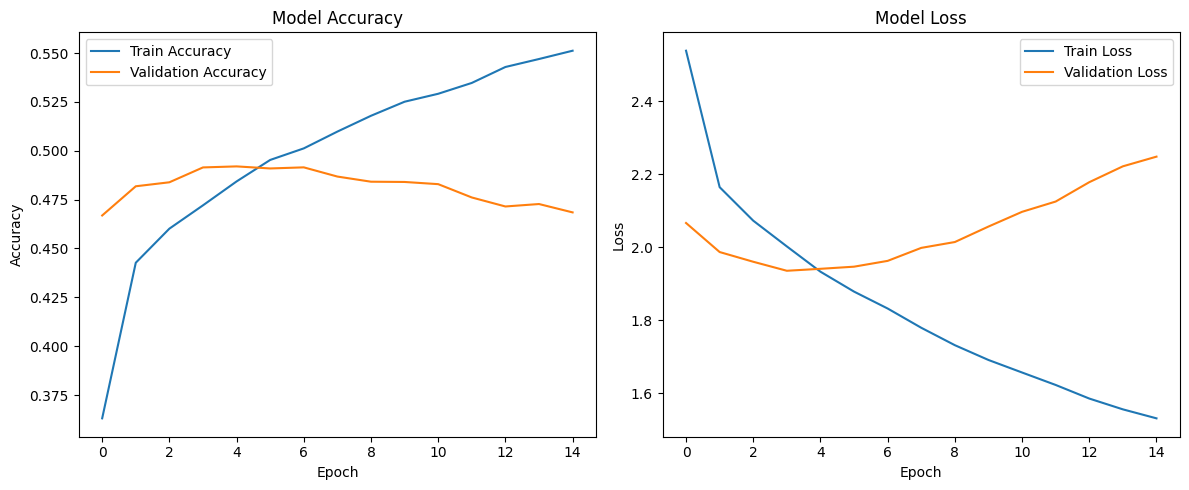

In [19]:
import matplotlib.pyplot as plt
 
# Plot the training history
plt.figure(figsize=(12, 5))
 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
 
plt.tight_layout()
plt.show()